In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns



In [3]:
!pip install pymc3 statsmodels theano

     |████████████████████████████████| 860kB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 8.1MB 30.6MB/s eta 0:00:01     |█████████████████               | 4.3MB 30.6MB/s eta 0:00:01
     |████████████████████████████████| 2.8MB 46.3MB/s eta 0:00:01
     |████████████████████████████████| 235kB 51.7MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 34.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 38.5MB/s eta 0:00:01
  Created wheel for theano: filename=Theano-1.0.4-cp37-none-any.whl size=2667178 sha256=f4e53f1c8016f967c53f8f8007eca2a9344cbfbfb96785b5ab4e1ea7bb872b92
  Stored in directory: /home/jovyan/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built theano


In [5]:
import pymc3 as pm
from statsmodels.datasets import get_rdataset
from theano import tensor as T

In [6]:
blue = sns.color_palette()[0]
np.random.seed(1087)

In [7]:
N = 20
K = 30

alpha = 2.
P0 = sp.stats.norm

In [8]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

x_plot = np.linspace(-3, 3, 200)

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

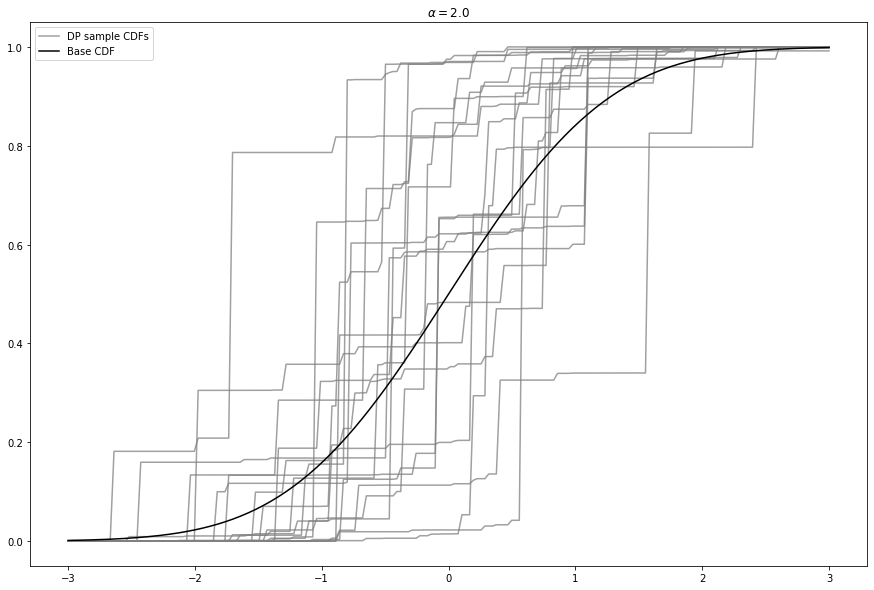

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
        label='DP sample CDFs');
ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

ax.set_title(r'$\alpha = {}$'.format(alpha));
ax.legend(loc=2);

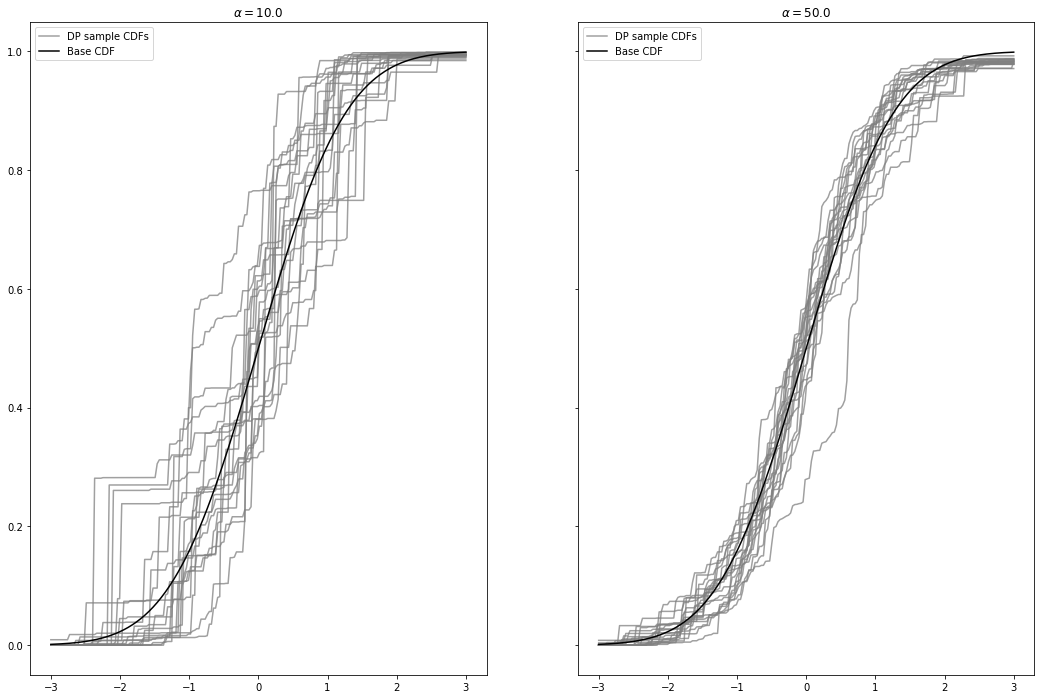

In [14]:
fig, (l_ax, r_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(18, 12))

K = 50
alpha = 10.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

l_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

l_ax.set_title(r'$\alpha = {}$'.format(alpha));
l_ax.legend(loc=2);

K = 200
alpha = 50.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

r_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
r_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
r_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

r_ax.set_title(r'$\alpha = {}$'.format(alpha));
r_ax.legend(loc=2);

In [21]:
!git rm -f PyMC3\ -\ Nonparametric\ Statistics.ipynb

rm 'PyMC3 - Nonparametric Statistics.ipynb'


In [22]:
!git checkout master

any of your branches:

  6c31715 pymc3

If you want to keep it by creating a new branch, this may be a good time
to do so with:

 git branch <new-branch-name> 6c31715

Switched to branch 'master'
Your branch is up to date with 'origin/master'.


In [23]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.bash_history
	.bash_logout
	.bashrc
	.config/
	.gitconfig
	.ipython/
	.local/
	.profile
	.theano/

nothing added to commit but untracked files present (use "git add" to track)
